In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import os
from keras.optimizers import SGD, Adagrad
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard,EarlyStopping


X = np.loadtxt("train.txt")
y = np.loadtxt("labels.txt", dtype = int)
print ("training dataset shape: ", X.shape)
print ("label shape: ", y.shape)


Using TensorFlow backend.


training dataset shape:  (2091900, 90)
label shape:  (2091900, 88)


In [4]:
import time
# Artificial Neural Network
batch_size = 1000
epochs = 50
optimizer = SGD(lr=0.9, decay=1e-5, momentum=0.9, nesterov=True)
#optimizer = 'Adagrad'
n_input = X.shape[1]
n_output = y.shape[1]
optimizer = SGD(lr=0.9, decay=1e-6, momentum=0.9, nesterov=True)

start = time.time()
nnmodel = Sequential()
nnmodel.add(Dense(300,input_dim=n_input, activation='relu'))
nnmodel.add(Dense(500,input_dim=n_input, activation='relu'))
#model.add(Dropout(dropout))
nnmodel.add(Dense(n_output, activation='sigmoid'))
nnmodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
print (nnmodel.summary())
#tbCallBack= TensorBoard(log_dir='./nn123', histogram_freq=0, write_graph=True, write_images=True)

early = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=0, verbose=0, mode='auto')
history1 = nnmodel.fit(X, y,batch_size=batch_size, epochs=100,validation_split = 0.1, callbacks=[early])
end = time.time()
print ("training time: %.4fs"%( end-start))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               27300     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_6 (Dense)              (None, 88)                44088     
Total params: 221,888
Trainable params: 221,888
Non-trainable params: 0
_________________________________________________________________
None
Train on 1882710 samples, validate on 209190 samples
Epoch 1/100
1882710/1882710 [==============================] - 12s - loss: 0.0852 - acc: 0.9697 - val_loss: 0.0821 - val_acc: 0.9721
Epoch 2/100
1882710/1882710 [==============================] - 12s - loss: 0.0663 - acc: 0.9762 - val_loss: 0.0776 - val_acc: 0.9737
Epoch 3/100
1882710/1882710 [==============================] - 12s - loss: 0

In [5]:
nnmodel.save('nn.h5')

In [6]:
import numpy as np
import os
from math import floor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,Adagrad,rmsprop
from keras.layers.normalization import BatchNormalization



#optimizer = 'Adagrad'
n = floor(X.shape[0]/5)
X_dim = X.shape[1]
X_train = X[0:5*n].reshape(n,5,X_dim,1)
del X
y_train = []
for i in range(n):
    y_train.append(y[5*i+2,:])
y_train = np.asarray(y_train)
del y
print ("training shape: ", X_train.shape)
print ("label shape: ", y_train.shape)

training shape:  (418380, 5, 90, 1)
label shape:  (418380, 88)


In [9]:
#Convolution neural network
batch_size = 200
epochs = 500
activation = 'relu'
optimizer = SGD(lr=0.9, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer = rmsprop(lr=0.1, decay=1e-6)
input_shape = (5, 90,1)

start = time.time()
model = Sequential()

model.add(Conv2D(20, (3, 3), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(40, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(88, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
print (model.summary())
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
history2 = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_split = 0.1,callbacks=[early])
end = time.time()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 5, 90, 20)         200       
_________________________________________________________________
activation_9 (Activation)    (None, 5, 90, 20)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 88, 20)         3620      
_________________________________________________________________
activation_10 (Activation)   (None, 3, 88, 20)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 44, 20)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 44, 20)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 44, 40)         7240      
__________

In [10]:
print ("training time: %.4fs"%( end-start))
model.save('cnn.h5')

training time: 326.9527s


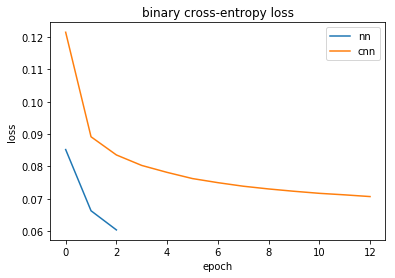

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])

plt.title('binary cross-entropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['nn','cnn'], loc='best')
plt.show()

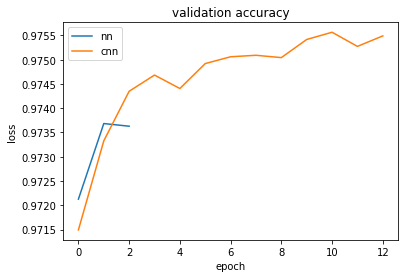

In [12]:
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])

plt.title('validation accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'nn', 'cnn'], loc='best')
plt.show()